# Himmelblau Benchmark
## Imports

In [7]:
import os
import pathlib
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#import torch

#pypath = os.path.join(str(pathlib.Path.cwd().parent.parent),"app","lib")

#sys.path.append(pypath)


from everest.benchmarks.singleobjective import Himmelblau
from everest.strategies.strategy import RandomStrategy
from everest.strategies.botorch.sobo import BoTorchSoboStrategy

from everest.benchmarks.visualization import plot_optimization_history, plot_pooloptimization_history
from everest.study import PoolStudy

## Run Strategies

In [2]:
num_optimizations = 5
num_iterations = 50
batch_size = 1

### Random Strategy

In [5]:
random_studies = []
for i in range(num_optimizations):
    study = Himmelblau()
    study.optimize(RandomStrategy(), batch_size=batch_size, num_iterations=num_iterations)
    random_studies.append(study)

100%|██████████| 50/50 [00:01<00:00, 33.06it/s, fbest=6.56]


### BO EI Strategy

In [6]:
bo_studies = []

for i in range(num_optimizations):
    study = Himmelblau()
    my_strategy = BoTorchSoboStrategy(
        num_sobol_samples=1024,
        num_restarts=8,
        num_raw_samples=1024,
        categorical_encoding = 'ONE_HOT',
        categorical_method = 'EXHAUSTIVE',
        acquisition_function='QEI')
    study.optimize(my_strategy, batch_size=batch_size, num_iterations = num_iterations)
    bo_studies.append(study)

100%|██████████| 50/50 [04:02<00:00,  4.84s/it, fbest=0.00328]


## Visualization

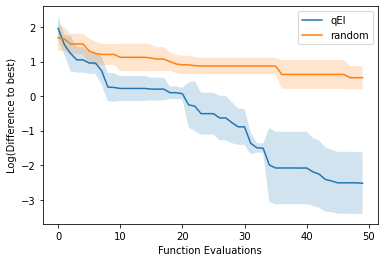

In [7]:
ax = plot_optimization_history(bo_studies,error_bar=True, log_scale=True, label = "qEI")
ax = plot_optimization_history(random_studies,error_bar=True, log_scale=True, label = "random", ax = ax)
ax.legend()
plt.show()

## Pool Study

In [2]:
benchmark = Himmelblau()
random_strategy = RandomStrategy.from_domain(benchmark.domain)
experiments = benchmark.run_candidate_experiments(random_strategy.ask(candidate_count=1000)[0])

studies = []
for i in range(5):
        pool = PoolStudy(domain=benchmark.domain,num_starting_experiments=5,experiments=experiments,metrics="STRATEGY")
        my_strategy = BoTorchSoboStrategy(
                num_sobol_samples=1024,
                num_restarts=8,
                num_raw_samples=1024,
                categorical_encoding = 'ONE_HOT',
                categorical_method = 'EXHAUSTIVE',
                acquisition_function='QEI')
        pool.optimize(my_strategy,num_iterations=10)
        studies.append(pool)



100%|██████████| 10/10 [00:01<00:00,  5.97it/s, dist2best=3.73]


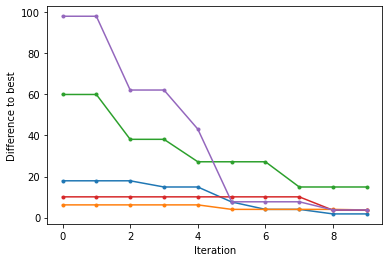

In [3]:
plot_pooloptimization_history(studies, error_bar=False, log_scale=False)
plt.show()